In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, datasets
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import os
import scipy
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples
from sklearn.decomposition import PCA , FastICA
import sys
import time
import matplotlib.cm as cm
import pandas as pd
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn import mixture
import itertools
from sklearn import metrics
import seaborn as sns
color = sns.color_palette()
from mpl_toolkits.mplot3d import Axes3D


In [8]:
""" Here we are using the direct preprocessed and calculated features from the continuous time signals
some 561 features are calculated from the data set and presented so we are directly using that  """


def extract_labels( file):
    labels = []
    new_labels=[]
    f = open(file)
    for line in f:
        labels.append( line.rstrip())
    for x in labels:
        new_labels.append(int(x))
    #print(len(new_labels))
    new_labels = np.asarray(new_labels)
    return new_labels
    #print( data_set.shape, new_labels.shape)
    #new_labels = np.transpose(new_labels)
    #print( type(new_labels), type(data_set))

In [9]:
def prepare_dataSet( input_file):
    data_set= []
    f = open(input_file)
    for line in f:
        data_set.append(line.split(' '))
    
    resulting_data=[]
    for data in data_set:
        data1 = [x.strip(' ') for x in data]
        data2=[]
        for x in data1:
            if(len(x) >0):
                data2.append(float(x))
        
        resulting_data.append( data2)
    
    
    #return resulting_data
    return np.asarray(resulting_data)

In [10]:
""" Loading the human activity dataset """



X_train1 = prepare_dataSet( './DataSet/train/X_train.txt')
X_train1 = preprocessing.StandardScaler().fit_transform(X_train1)
#X_train1 = preprocessing.scale(X_train1)
y_train1 = extract_labels('./DataSet/train/y_train.txt')
X_test1 = prepare_dataSet('./DataSet/test/X_test.txt')
X_test1= preprocessing.scale( X_test1)

y_test1 = extract_labels('./DataSet/test/y_test.txt')


In [11]:
""" so we have 7352 rows and each row has 561 features """

print(X_train1.shape )

(7352, 561)


In [13]:
""" DOing kmeans clustering on the data set """

def Kmeans_clustering( X):
	clusters = list(range( 1, 10))
	inertia_arr = []

	for c in clusters:
		print(c)
		cluster = KMeans( n_clusters =c, random_state=14, n_init = 50)
		cluster_labels = cluster.fit(X)
		inertia_arr.append( cluster.inertia_)
	inertia_arr =np.array( inertia_arr)
	plt.plot(clusters,inertia_arr)
	plt.xlabel('Number of Clusters')
	plt.ylabel('Inertia')
	plt.title('Choosing Best k with Inertia')
	plt.grid()
	plt.show()

    


1
2
3
4
5
6
7
8
9


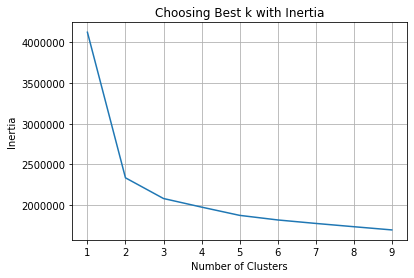

In [15]:
Kmeans_clustering(X_train1)

In [16]:
""" Silhouette score for the clustser and visualisation of the activity data using clustering"""


def Kmeans_silhouette_analysis(X,y):
	cluster_range = [2]
	for num_cluster in cluster_range:
	    fig, (ax1, ax2) = plt.subplots(1, 2)
	    fig.set_size_inches(18, 7)
	   
	    ax1.set_xlim([-0.1, 1])
	    ax1.set_ylim([0, len(X) + (num_cluster + 1) * 10])

	    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
	    cluster_labels = clusterer.fit_predict(X)

	    silhouette_avg = silhouette_score(X, cluster_labels)
	    print("For n_clusters = ", num_cluster,
	          "The average silhouette_score is :", silhouette_avg)
	    sample_silhouette_values = silhouette_samples(X, cluster_labels)

	    y_lower = 10
	    for i in range(num_cluster):
	        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

	        ith_cluster_silhouette_values.sort()

	        size_cluster_i = ith_cluster_silhouette_values.shape[0]
	        y_upper = y_lower + size_cluster_i

	        color = cm.nipy_spectral(float(i) / num_cluster)
	        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

	        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

	        y_lower = y_upper + 10 

	    ax1.set_title("The silhouette plot for the various clusters.")
	    ax1.set_xlabel("The silhouette coefficient values")
	    ax1.set_ylabel("Cluster label")

	    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

	    ax1.set_yticks([])  
	    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

	    colors = cm.nipy_spectral(cluster_labels.astype(float) / num_cluster)
	    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
	                c=colors, edgecolor='k')

	    centers = clusterer.cluster_centers_

	    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

	    for i, c in enumerate(centers):
	        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

	    ax2.set_title("The visualization of the clustered data.")
	    ax2.set_xlabel("Feature space for the 1st feature")
	    ax2.set_ylabel("Feature space for the 2nd feature")

	    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with num_cluster = %d" % num_cluster),fontsize=14, fontweight='bold')
	plt.show()

For n_clusters =  2 The average silhouette_score is : 0.3965049403141253


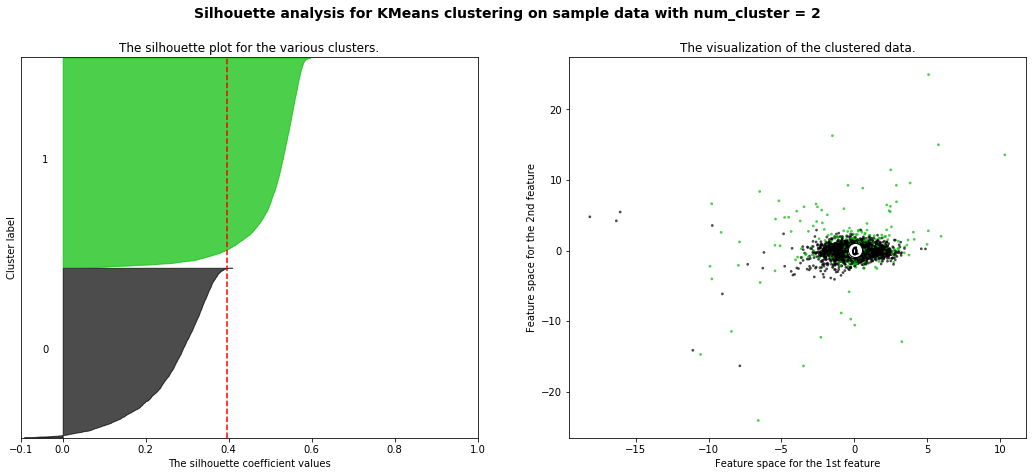

In [18]:
Kmeans_silhouette_analysis( X_train1, y_train1)

In [19]:
""" Expectation maximisation clustering on the activity dataset using gaussian mixture implemented in sklearn

the number of cluster found usind the BIC criteria which cluster lowers the BIC value"""



def gmm_analysis(X,y):
	lowest_bic = np.infty
	bic = []
	n_components_range = range(1, 8)
	cv_types = ['spherical', 'tied', 'diag', 'full']
	for cv_type in cv_types:
	    for n_components in n_components_range:
	        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, max_iter = 200)
	        gmm.fit(X)
	        bic.append(gmm.bic(X))
	        if bic[-1] < lowest_bic:
	            lowest_bic = bic[-1]
	            best_gmm = gmm

	bic = np.array(bic)
	color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
	clf = best_gmm
	bars = []
	plt.figure(figsize=(8, 6))
	spl = plt.subplot(2, 1, 1)

	for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
	    xpos = np.array(n_components_range) + .2 * (i - 2)
	    bars.append(plt.bar(xpos, bic[i * len(n_components_range):(i + 1) * len(n_components_range)], width=.2, color=color))
	
	plt.xticks(n_components_range)
	plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
	plt.title('BIC score per model')
	xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
	best_num = np.mod(bic.argmin(), len(n_components_range)) + 1
	plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
	spl.set_xlabel('Number of components')
	spl.legend([b[0] for b in bars], cv_types)

	
	splot = plt.subplot(2, 1, 2)
	Y_ = clf.predict(X)
	
	for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,color_iter)):
	    v, w = linalg.eigh(cov)
	    if not np.any(Y_ == i):
	        continue
	    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

	    angle = np.arctan2(w[0][1], w[0][0])
	    angle = 180. * angle / np.pi 
	    v = 2. * np.sqrt(2.) * np.sqrt(v)
	    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
	    ell.set_clip_box(splot.bbox)
	    ell.set_alpha(.5)
	    splot.add_artist(ell)
	
	plt.xticks(())
	plt.yticks(())
	plt.title('Selected GMM: full model,' + str(best_num) + ' components')
	plt.subplots_adjust(hspace=.35, bottom=.02)
	plt.show()
	return best_num

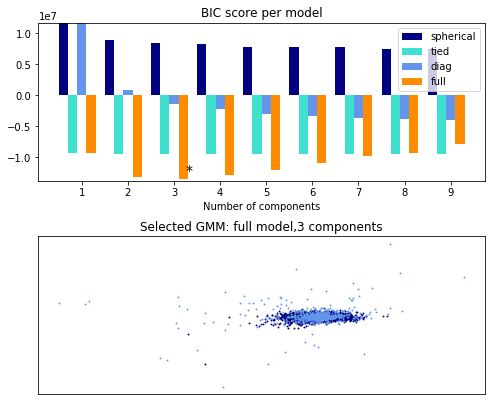

3

In [20]:
""" here we see that it selects the clusters to be 3 """


gmm_analysis(X_train1, y_train1)

In [21]:
""" Now we are doing dimensionality reduction on the data set which is a common thing in machine learning which 
can speed the process and reduce the complexity of the learner

so first ALgo used is PCA ( Principle Component Analysis) 

the number of features are 561 currently  

PCA selects the components which have the maximum variance it is assumed that the features having maximum 
variance has most of the predictive power of the dataset"""


' Now we are doing dimensionality reduction on the data set which is a common thing in machine learning which \ncan speed the process and reduce the complexity of the learner\n\nso first ALgo used is PCA ( Principle Component Analysis)'

In [22]:
""" The number of components are selected using the variance  and the reconstruction error """


' The number of components are selected using the variance  and the reconstruction error '

In [27]:
# this will calculate the variance for each feature

pca = PCA()
pca.fit(X_train1) 

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

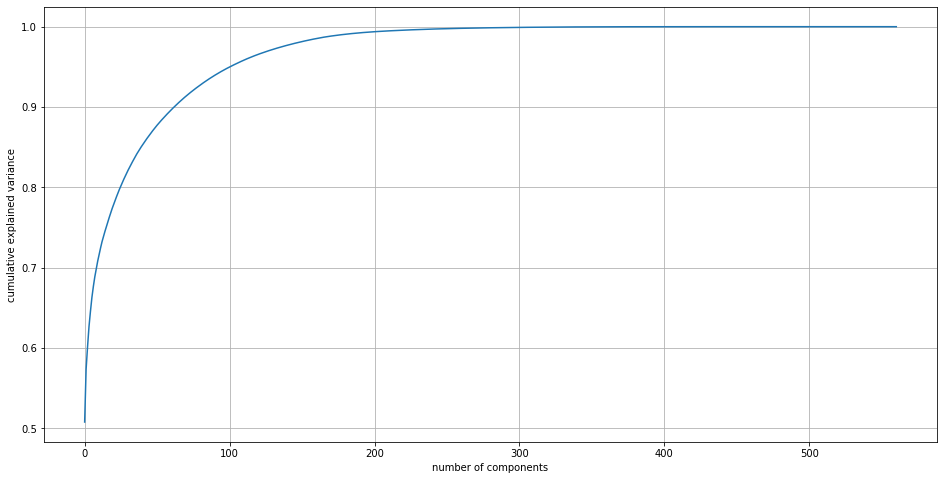

In [28]:
# Below figure shows that first 200 components are good to retain 100 varince and rest of the features can be 
# dropped and but we can still reduce the number of components if we take 90 percent variance for which only 60 
# components are required which means reduction from 561 to 60

plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

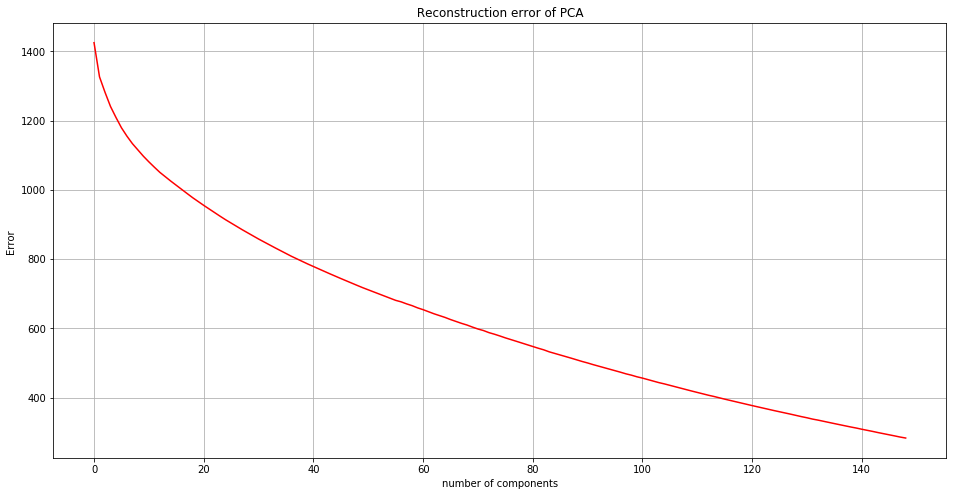

In [32]:
# determining number of components using reconstruction error 
maximum_components = 150  # taking 150 components 
start = 1

# error how much error comes if we reconstruct the original data using the components
error_record=[]
for i in range( start, maximum_components):
    pca = PCA(n_components=i, random_state=42)
    pca2_results = pca.fit_transform(X_train1)
    pca2_proj_back=pca.inverse_transform(pca2_results)
    total_loss=np.linalg.norm((X_train1-pca2_proj_back),None)
    error_record.append(total_loss)

# plot the error with number of components 
plt.figure(figsize=(16,8))
plt.plot(error_record,'r')
plt.xlabel('number of components')
plt.ylabel('Error ')
plt.title(" Reconstruction error of PCA ")
plt.grid()
plt.show()
    

In [35]:
# plotting the eigen values of the components and take components which have high eigen values 

def find_eigen_values( x, y):
	y = np.transpose(x)
	cov_mat = np.cov( [ y[k,:] for k in range( len(y))])
	eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
	for i in range(len(eig_val_cov)):
		eigvec_cov = eig_vec_cov[:,i].reshape(1,len(y)).T
		#print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
	eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
	eig_pairs.sort(key=lambda x: x[0], reverse=True)
	eig_values= [lis[0] for lis in eig_pairs]
	return eig_values

In [36]:
eig_values =find_eigen_values( X_train1, y_train1)

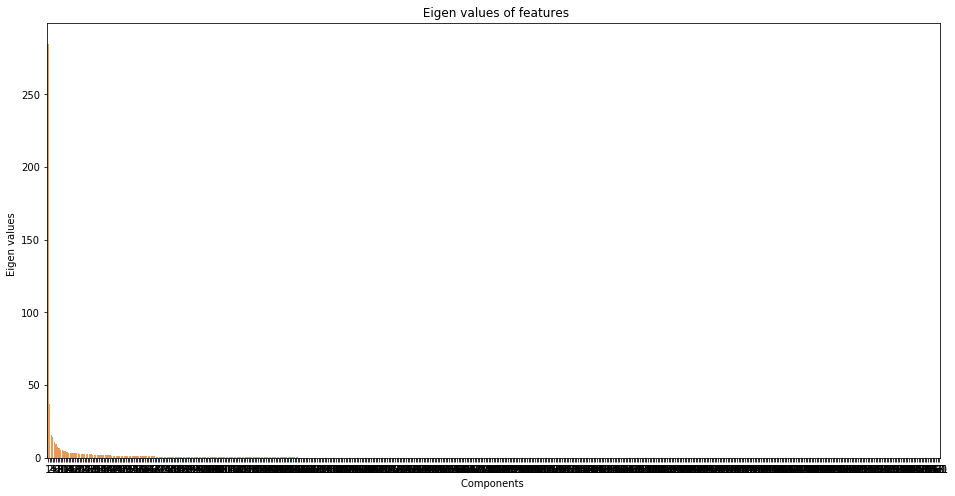

In [38]:
# plotting the eigen values in decreasing order 
plt.figure(figsize=(16,8))
sns.barplot(np.arange( 1, len(eig_values)+1),eig_values, alpha=0.8, color=color[1])
plt.xlabel('Components ')
plt.ylabel('Eigen values  ')
plt.title(" Eigen values of features")
#plt.grid()
plt.show()

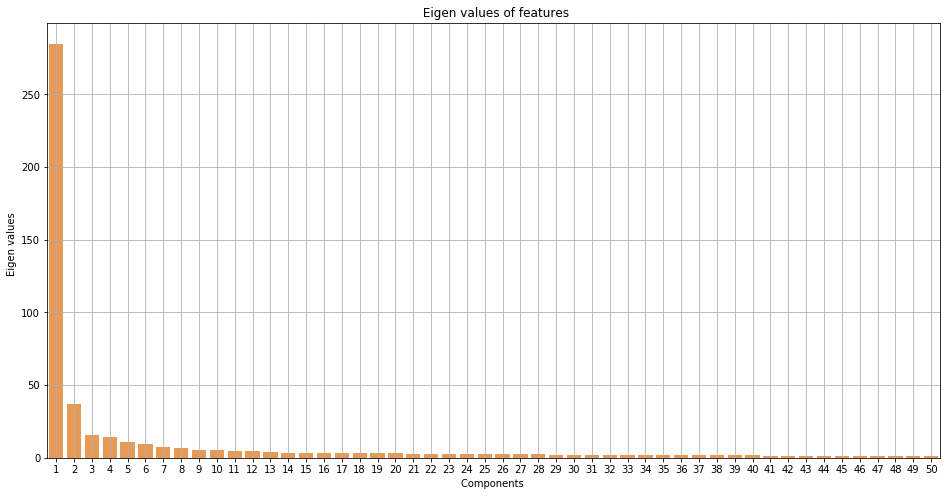

In [47]:
# plotting the first 50 components only for better visualisation 
# we can see that the huge variation in the eigen values first few which matter and rest has very low values and 
# can be dropped we selected the number of components to be 60 so a huge dimensionality reduction is done from 
# 561 to 60


plt.figure(figsize=(16,8))
sns.barplot(np.arange( 1, 51),eig_values[:50], alpha=0.8, color=color[1])
plt.xlabel('Components ')
plt.ylabel('Eigen values  ')
plt.title(" Eigen values of features")
plt.grid()
plt.show()

In [68]:
# transform the data into new data 

X_new  = PCA( n_components=60).fit_transform( X_train1)


In [69]:
print( X_new.shape)

(7352, 60)


In [48]:
# We try to visualise the data using 3 component 1,2,3 which have the highest components values as the dimension 
# or features value increases it becomes difficult to visualise the data 
data_plot = PCA( n_components=3).fit_transform( X_train1)


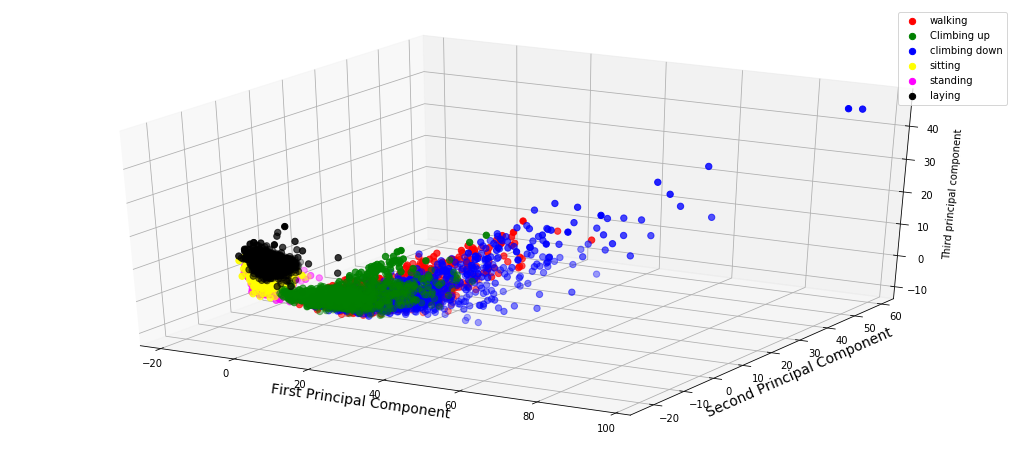

In [63]:
# Plotting the data_plot 

# extract the 3 data points 

Xax=data_plot[:,0]
Yax=data_plot[:,1]
Zax = data_plot[:,2]

cdict={1:'red',2:'green', 3:'blue', 4:'yellow',5:'magenta',6:'black'}
# Activities or labels 

labl={1:'walking',2:'Climbing up', 3: 'climbing down', 4: 'sitting',5:'standing', 6:'laying'}

#marker={1:'*',2:'o',3:'.',4:'v',5:'^',6:'<'}
#marker = { }

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')

labels = y_train1

for l in np.unique( labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],Zax[ix],c=cdict[l], s= 40,label=labl[l],marker='o')


plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
ax.set_zlabel('Third principal component')
plt.legend()
plt.show()


In [64]:
# we can see in the above graph walking , climbing up and climbing down are close to each other
# sitting , standing , laying are close to each other 
# that's why we found the clusters to be 2 in kmeans 


For n_clusters =  2 The average silhouette_score is : 0.5602202109705003


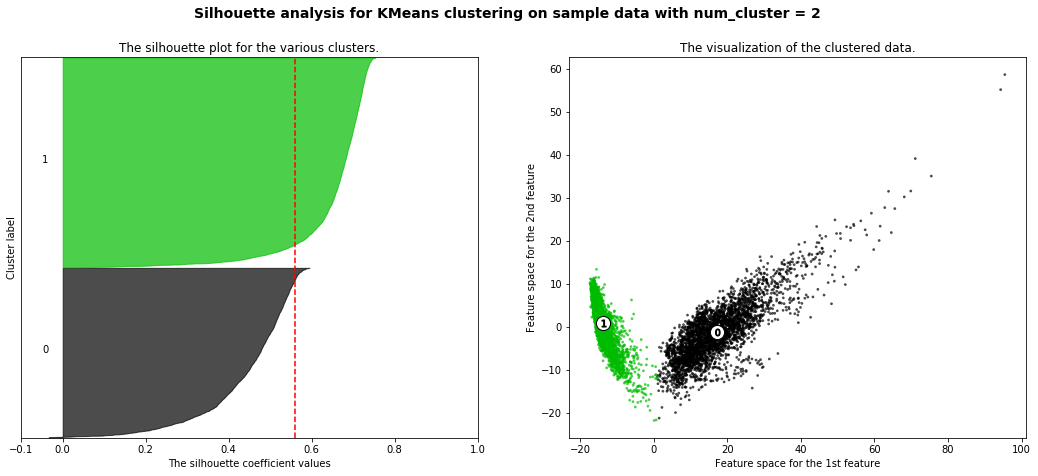

In [65]:
# Clustering using the new data 

Kmeans_silhouette_analysis( X_new, y_train1)

1
2
3
4
5
6
7
8
9


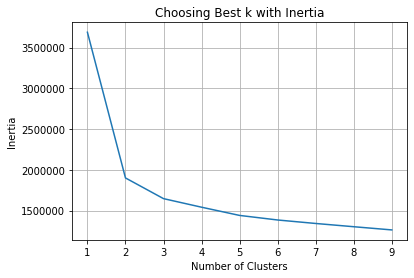

In [70]:
# we can see the difference before PCA and after PCA the silhouette score has increased and the data 
# has become more separated and well defined

# Now we run the gausssian mixture expectation maximisation algorithm using the new data  
Kmeans_clustering(X_new)


# k means still find the number of clusters to be 2 we can see why using the above distribution of data 

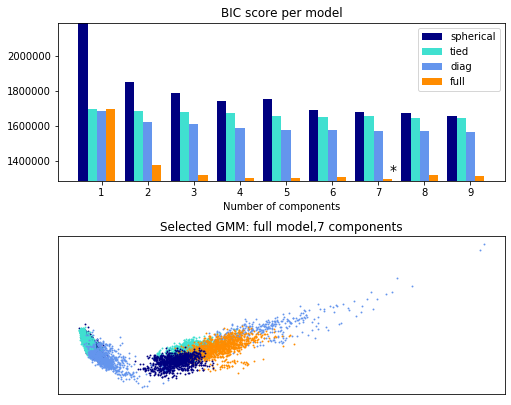

7

In [71]:
# here expectation maximisation gaussian find the cluster to be 7 which is pretty close to the actual number of labels


gmm_analysis( X_new, y_train1)

In [ ]:
# so using PCA we have successfully made the data better and reduced the features from 560 to 60 and also the 
# curse of dimensionality